In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesIntegration
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
import Meshes: coordinates
using Plots

Point3 = EnvelopeApproximation.Point3


Point3 (alias for Meshes.Point{3, Float64})

# Setting up the bubbles

In [2]:
d = 1.
ΔV = 1.
ηs = LinRange(0.5, 15, 100)
bubbless = bubbless = [Bubbles([Bubble(Point3(0., 0., -d / 2) , η), Bubble(Point3(0., 0., d / 2), η)]) for η in ηs]
bubbless

100-element Vector{Bubbles}:
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.5), Bubble(Point(0.0, 0.0, 0.5), 0.5)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.6464646464646465), Bubble(Point(0.0, 0.0, 0.5), 0.6464646464646465)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.7929292929292929), Bubble(Point(0.0, 0.0, 0.5), 0.7929292929292929)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.9393939393939394), Bubble(Point(0.0, 0.0, 0.5), 0.9393939393939394)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.0858585858585859), Bubble(Point(0.0, 0.0, 0.5), 1.0858585858585859)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.2323232323232323), Bubble(Point(0.0, 0.0, 0.5), 1.2323232323232323)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.378787878787879), Bubble(Point(0.0, 0.0, 0.5), 1.378787878787879)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.525252525252525), Bubble(Point(0.0, 0.0, 0.5), 1.525252525252525)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.6717171717171

# Setting up the Ks

In [3]:
k_vecs = [Point3(0., 1., 1.)]
norm(p:: Point3) = norm(coordinates(p), 2)

norm (generic function with 23 methods)

In [4]:
k_vecs

1-element Vector{Meshes.Point3}:
 Point(0.0, 1.0, 1.0)

# Computing Numerically

In [5]:
tensor_directions = [(:x, :x), (:y, :y), (:z, :z)]
T_ij = EnvelopeApproximation.StressEnergyTensor.T_ij
numerical_T_ij = [T_ij(k_vecs, bubbles, 50, 50, ΔV,  tensor_directions; rtol=1e-3) for bubbles in bubbless]

100-element Vector{Matrix{ComplexF64}}:
 [1.165153570003008 + 2.6624058182709784e-15im 1.1503763497338884 + 2.3993121570723214e-15im 1.1503763497338897 + 2.601543112878968e-15im]
 [2.3202871823690687 + 4.464121130046128e-15im 2.2690673683589115 + 3.8987067060098425e-15im 2.0912653465127335 + 4.448481513708025e-15im]
 [3.833658752846244 + 3.968728828646767e-15im 3.700784249874631 + 2.7863607785908503e-15im 3.3248059140935977 + 4.208872833588728e-15im]
 [5.55277088149826 + 2.9918830000280616e-15im 5.273416257236857 + 9.798994882726756e-16im 4.663994534391421 + 3.287409407193298e-15im]
 [7.639958750326541 + 1.7039389105417968e-15im 7.105617777014966 - 2.5650072996112193e-15im 6.231909687900127 + 1.928694020898042e-15im]
 [9.548478478103114 - 9.82856374412422e-16im 8.663667475382237 - 5.651816858521597e-15im 7.540454808152141 + 1.491862189340054e-16im]
 [11.547067260945994 - 4.7923362327118024e-15im 10.154205513420331 - 1.1790304120184677e-14im 8.761600638435736 - 2.4251434194155763e-15im]

# Z Z

In [11]:
T_xx = numerical_T_ij .|> x -> x[1] .|> real
T_yy = numerical_T_ij .|> x -> x[2] .|> real
T_zz = numerical_T_ij .|> x -> x[3] .|> real

100-element Vector{Float64}:
   1.1503763497338897
   2.0912653465127335
   3.3248059140935977
   4.663994534391421
   6.231909687900127
   7.540454808152141
   8.761600638435736
   9.567285147621362
   9.786812779545652
   9.762293059743802
   ⋮
 242.29374552090937
 278.10827244833877
 302.82840687800666
 314.8876851575222
 313.23901475850835
 297.42312423164185
 267.60979757965856
 224.61562444624298
 169.88941931461915

In [12]:
T_zz

100-element Vector{Float64}:
   1.1503763497338897
   2.0912653465127335
   3.3248059140935977
   4.663994534391421
   6.231909687900127
   7.540454808152141
   8.761600638435736
   9.567285147621362
   9.786812779545652
   9.762293059743802
   ⋮
 242.29374552090937
 278.10827244833877
 302.82840687800666
 314.8876851575222
 313.23901475850835
 297.42312423164185
 267.60979757965856
 224.61562444624298
 169.88941931461915

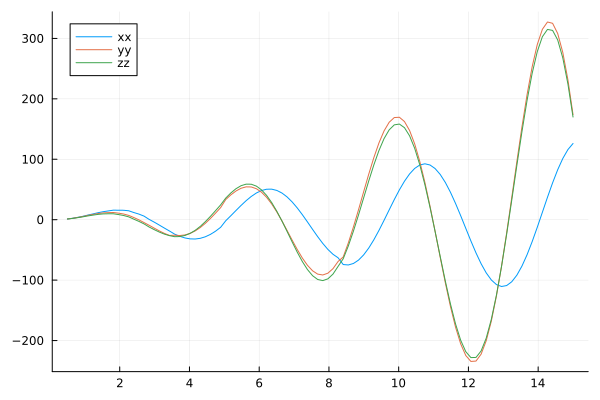

"/home/ben/.julia/dev/EnvelopeApproximation/scripts/benchmarks/comparison_to_Maya/varying_eta_constant_k.png"

In [13]:
p = plot(ηs, T_xx, label="xx")
plot!(ηs, T_yy, label="yy")
plot!(ηs, T_zz, label="zz")
display(p)
savefig("varying_eta_constant_k.png")

# Saving the data

In [14]:
import Meshes: coordinates
k = k_vecs[1] |> coordinates |> collect

3-element Vector{Float64}:
 0.0
 1.0
 1.0

In [15]:
data = Dict("eta" => ηs, "T_xx" => T_xx, "T_yy" => T_yy, "T_zz" => T_zz, 
            "d" => d, "k" => k)

Dict{String, Any} with 6 entries:
  "T_zz" => [1.15038, 2.09127, 3.32481, 4.66399, 6.23191, 7.54045, 8.7616, 9.56…
  "T_xx" => [1.16515, 2.32029, 3.83366, 5.55277, 7.63996, 9.54848, 11.5471, 13.…
  "k"    => [0.0, 1.0, 1.0]
  "eta"  => LinRange{Float64}(0.5, 15.0, 100)
  "T_yy" => [1.15038, 2.26907, 3.70078, 5.27342, 7.10562, 8.66367, 10.1542, 11.…
  "d"    => 1.0

In [16]:
using JSON

filename = "varying_eta_constant_k_data.json"

# Save the JSON string to a file
open(filename, "w") do file
    write(file, JSON.json(data))
end

println("Data saved to $filename")

Data saved to varying_eta_constant_k_data.json
